![image](https://github.com/eWaterCycle/ewatercycle/raw/main/docs/examples/logo.png)

# Generate forcing in eWaterCycle with ESMValTool

This notebooks shows how to generate forcing data for Wflow model using ERA5 data and [ESMValTool hydrological recipes](https://docs.esmvaltool.org/en/latest/recipes/recipe_hydrology.html#wflow). More information about data, configuration and installation instructions can be found in the [System setup](https://ewatercycle.readthedocs.io/en/latest/system_setup.html) in the eWaterCycle documentation.

In [5]:
import logging
import warnings
from pathlib import Path

warnings.filterwarnings("ignore", category=UserWarning)

logger = logging.getLogger("esmvalcore")
logger.setLevel(logging.WARNING)

In [2]:
import xarray as xr
from rich import print

import ewatercycle.forcing

Forcing for Wflow is created using the ESMValTool recipe. It produces one file that contains three variables: temperature, precipitation, and potential evapotranspiration. You can set the start and end date, and the region. See [eWaterCycle documentation](https://ewatercycle.readthedocs.io/en/latest/apidocs/ewatercycle.forcing.html#submodules) for more information. 

To download `wflow_dem.map`, see the [instructions](https://ewatercycle.readthedocs.io/en/latest/system_setup.html#download-example-parameter-sets).

In [9]:
wflow_forcing = ewatercycle.forcing.sources["WflowForcing"].generate(
    dataset="ERA5",
    start_time="1990-01-01T00:00:00Z",
    end_time="1990-12-31T00:00:00Z",
    shape="./data/Rhine/Rhine.shp",
    dem_file=str(Path("./data/wflow_dem.map").absolute()),
)

In [10]:
print(wflow_forcing)

WflowForcing(
    model='wflow',
    start_time='1990-01-01T00:00:00Z',
    end_time='1990-12-31T00:00:00Z',
    directory=PosixPath('/home/verhoes/git/eWaterCycle/ewatercycle/docs/plugins/wflow/esmvaltool_output/tmp1m1zqsj9
recipe_wflow_20230731_110859/work/wflow_daily/script'),
    shape=PosixPath('/home/verhoes/git/eWaterCycle/ewatercycle/docs/plugins/wflow/esmvaltool_output/tmp1m1zqsj9reci
pe_wflow_20230731_110859/work/wflow_daily/script/data/Rhine/Rhine.shp'),
    netcdfinput='wflow_ERA5_Rhine_1990_1990.nc',
    Precipitation='/pr',
    EvapoTranspiration='/pet',
    Temperature='/tas',
    Inflow=None
)

### Plot forcing

<xarray.Dataset>
Dimensions:    (time: 365, lat: 169, lon: 187, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1990-01-01T12:00:00 ... 1990-12-31T12:00:00
  * lat        (lat) float64 52.05 52.02 51.98 51.94 ... 46.0 45.97 45.93 45.89
  * lon        (lon) float64 5.227 5.264 5.3 5.337 ... 11.94 11.97 12.01 12.05
    height     float64 2.0
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 0.2794 0.2794 0.2794 ... 0.177 0.177
    time_bnds  (time, bnds) datetime64[ns] 1990-01-01 1990-01-02 ... 1991-01-01
    lat_bnds   (lat, bnds) float64 52.07 52.04 52.04 52.0 ... 45.91 45.91 45.88
    lon_bnds   (lon, bnds) float64 5.209 5.245 5.245 5.282 ... 12.03 12.03 12.07
    tas        (time, lat, lon) float32 0.09246 0.07101 0.03317 ... 3.454 4.227
    pet        (time, lat, lon) float32 0.5102 0.5103 0.5106 ... 0.5572 0.5536
Attributes:
    Conventions:  CF-1.7
    software:     Created with ESMValTool v2.8.1
    caption:      Forcings for the wflow hydrological model.

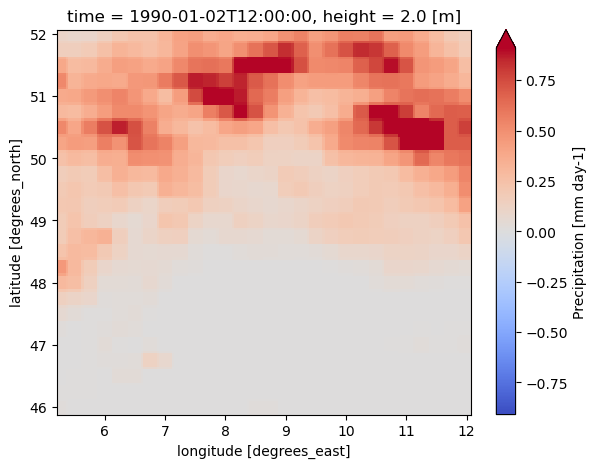

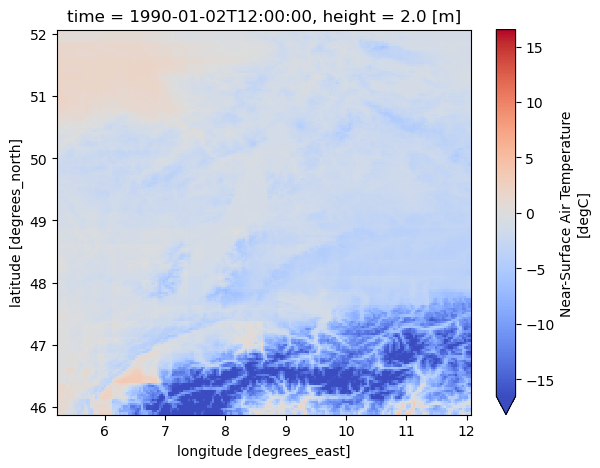

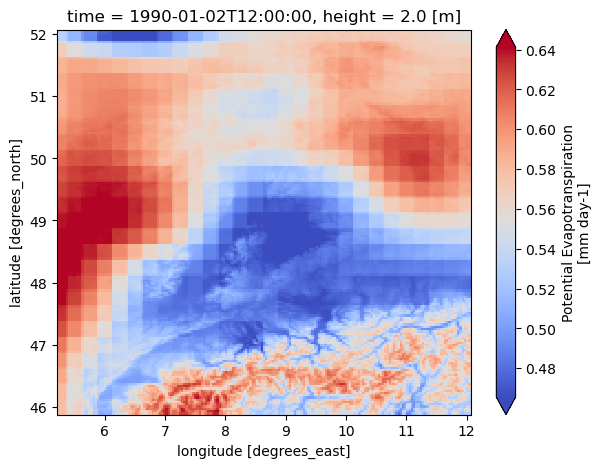

In [11]:
dataset = xr.load_dataset(f"{wflow_forcing.directory}/{wflow_forcing.netcdfinput}")
print(dataset)
for var in ["pr", "tas", "pet"]:
    dataset[var].isel(time=1).plot(cmap="coolwarm", robust=True, size=5)